In [1]:
import math
import random

class Point:
    def __init__(self, i, j, ic, jc, k, sigma):
        self.i = i
        self.j = j
        self.ic = ic
        self.jc = jc
        self.k = k
        self.sigma = sigma

    def dist(self):
        return ((self.i-self.ic)**2 + (self.j-self.jc)**2)**0.5

    def pab(self):
        return math.exp(-self.dist()**2/(self.k*self.sigma))

    def status(self):
        return 1-int(random.random()+1-self.pab())

In [2]:
p = Point(3, 4, 0, 0, 1, 1)
p.dist()
random.random()

0.8656535044865387

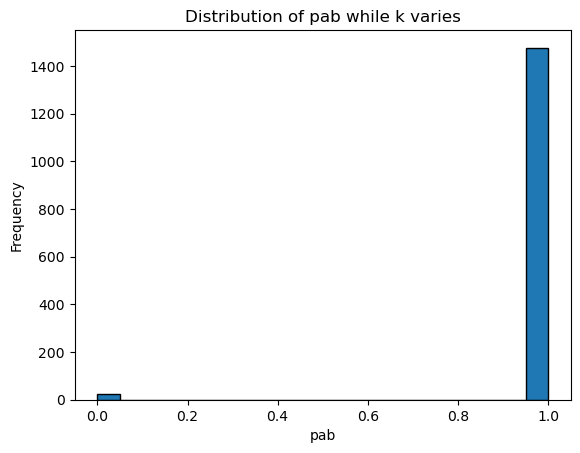

In [3]:
p.pab()


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Initialize the list to store the pab values
pab_values = []

# Define the range of k values
k_values = np.arange(1, 1500, 1)

# Calculate the pab value for each k
for k in k_values:
  p = Point(4, 3, 0, 0, k, 6)
  pab_values.append(p.status())

# Plot the histogram
plt.hist(pab_values, bins=20, edgecolor='black')
plt.xlabel('pab')
plt.ylabel('Frequency')
plt.title('Distribution of pab while k varies')
plt.show()

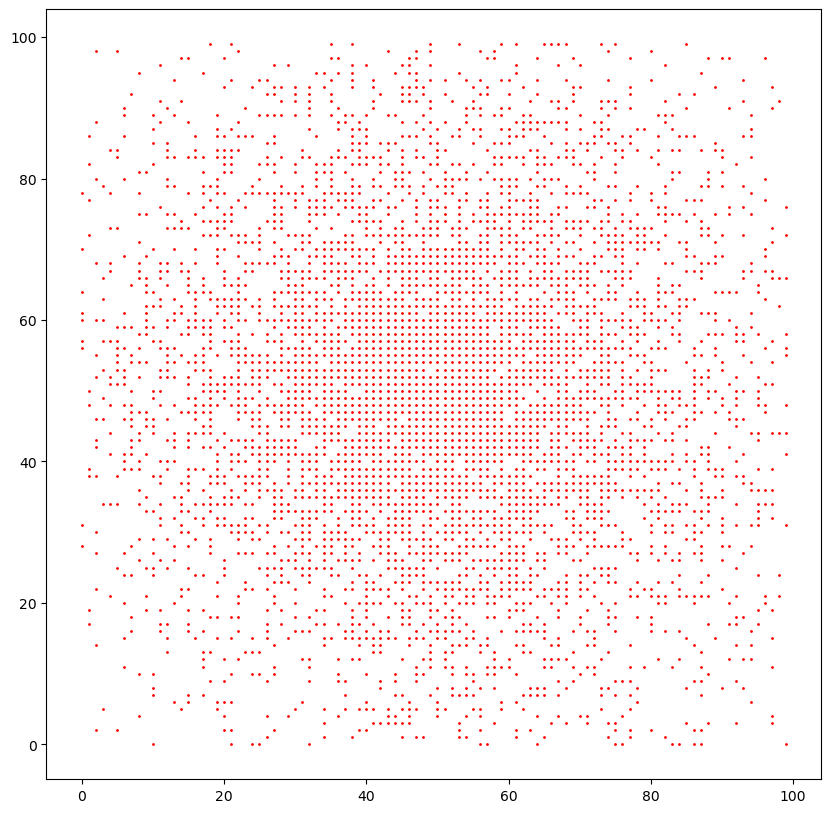

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import asyncio

import nest_asyncio
nest_asyncio.apply()
# Create a 30x50 picture
plt.figure(figsize=(10, 10))

dn=1
dm=1
ic=50
jc=50
k=300
sigma=5

async def draw_point(i, j, ic, jc, k, sigma):
    p = Point(i, j, ic, jc, k, sigma)
    if p.status() == 1:
        plt.scatter(j, i, s= 1, color='r')  # Note that j is the x-coordinate and i is the y-coordinate

# Create and draw the points
loop = asyncio.get_event_loop()
tasks = []
for i in np.arange(0, 100, dm):
    for j in np.arange(0, 100, dn):
        task = loop.create_task(draw_point(i, j, ic, jc, k, sigma))
        tasks.append(task)
loop.run_until_complete(asyncio.gather(*tasks))

# Show the picture
plt.show()

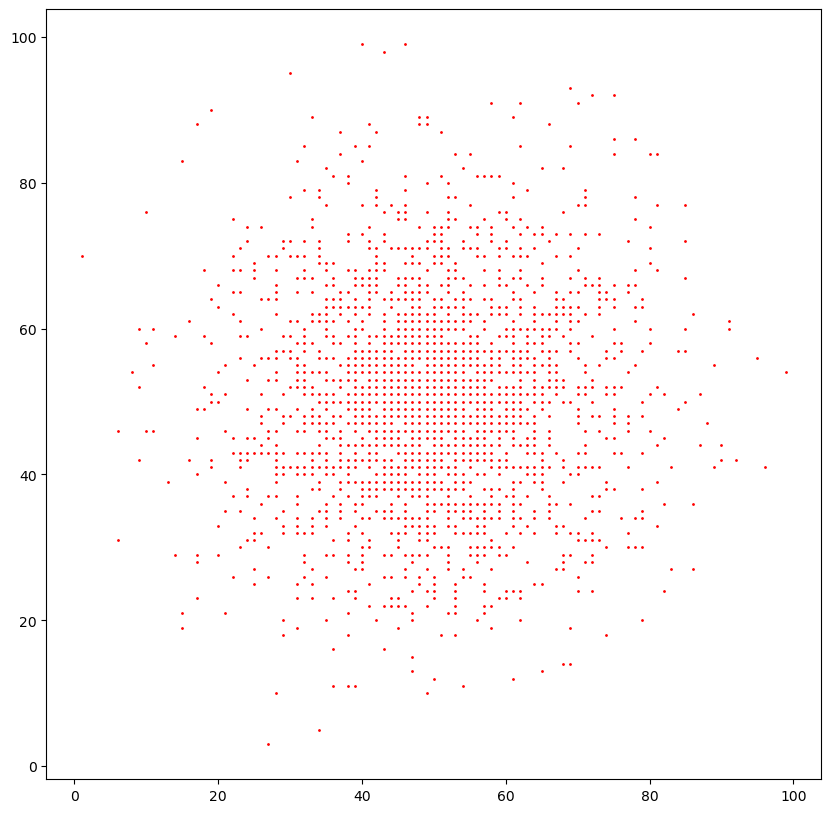

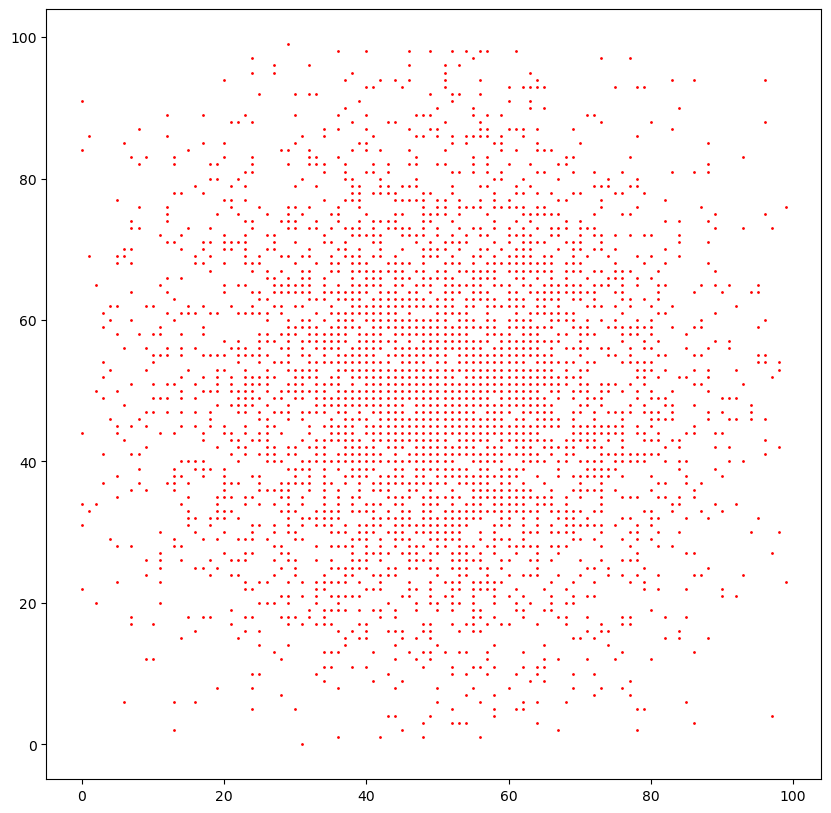

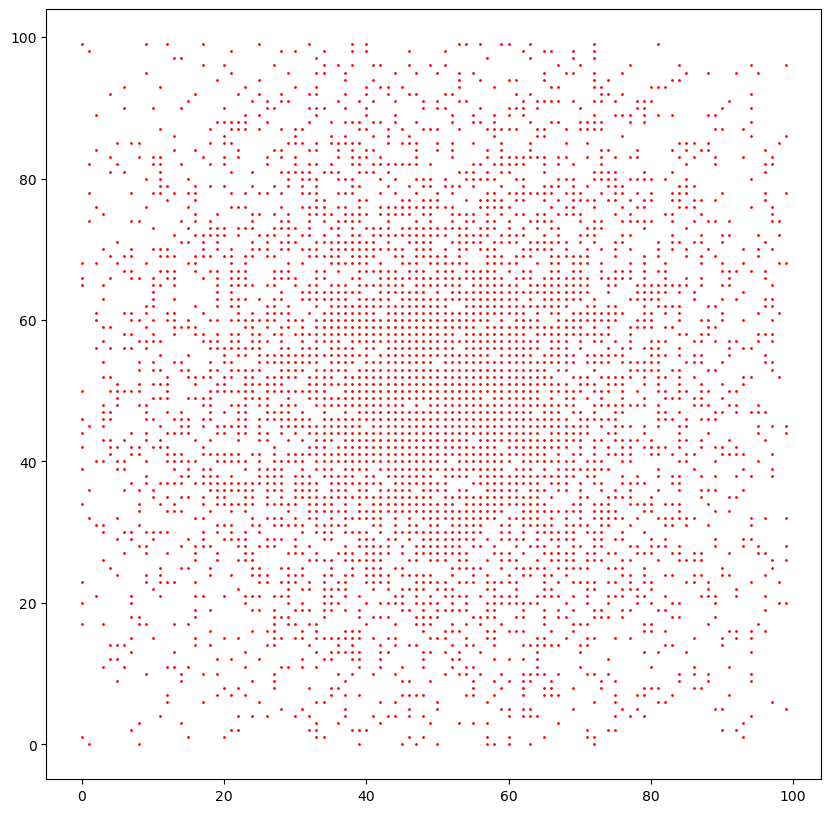

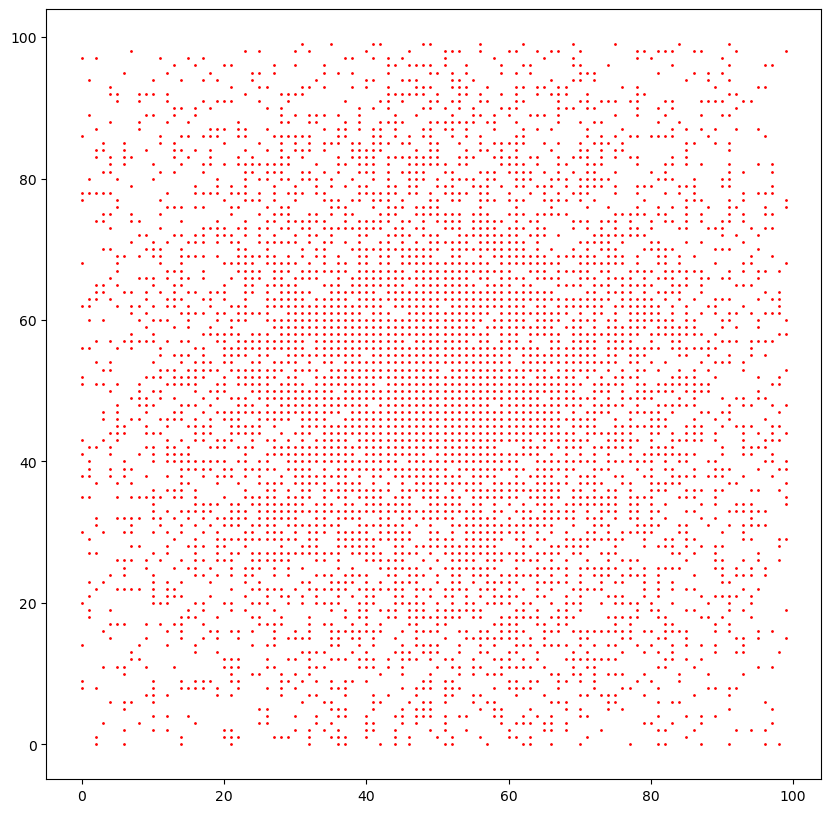

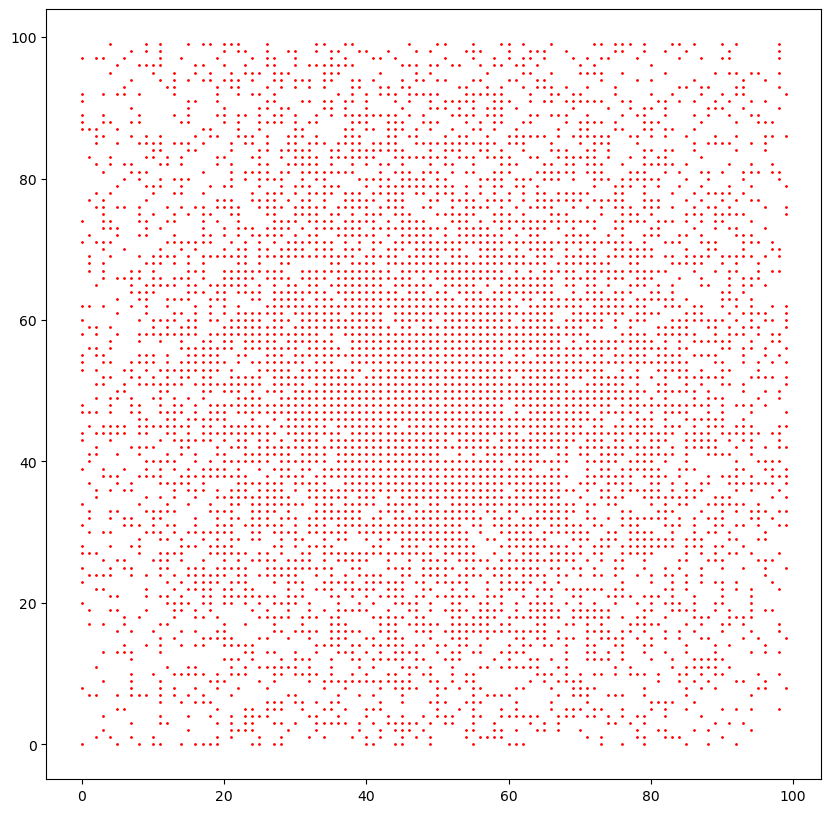

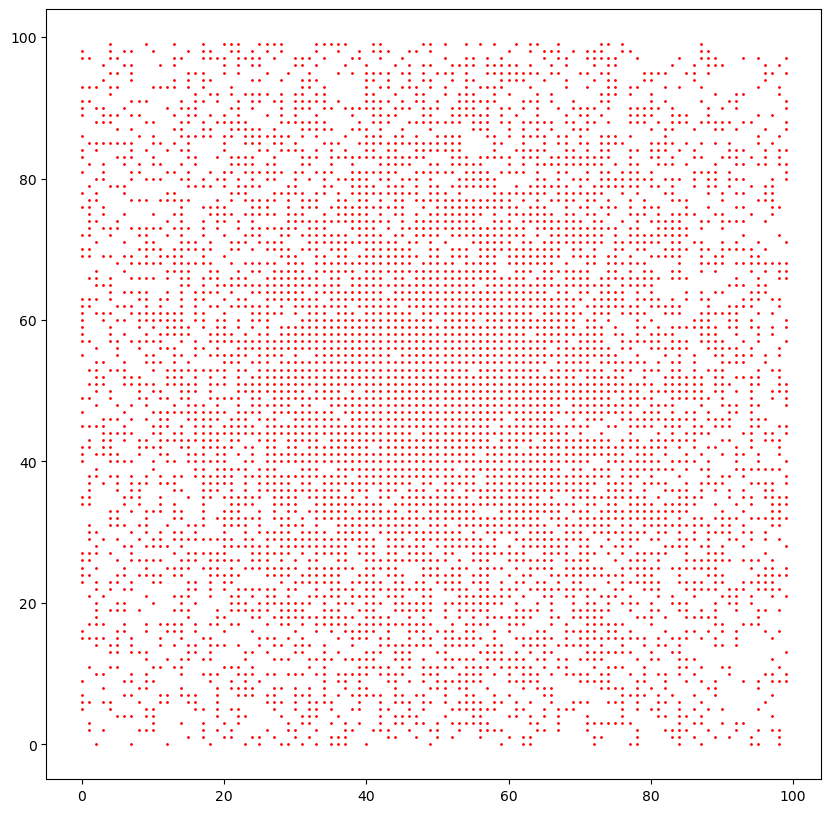

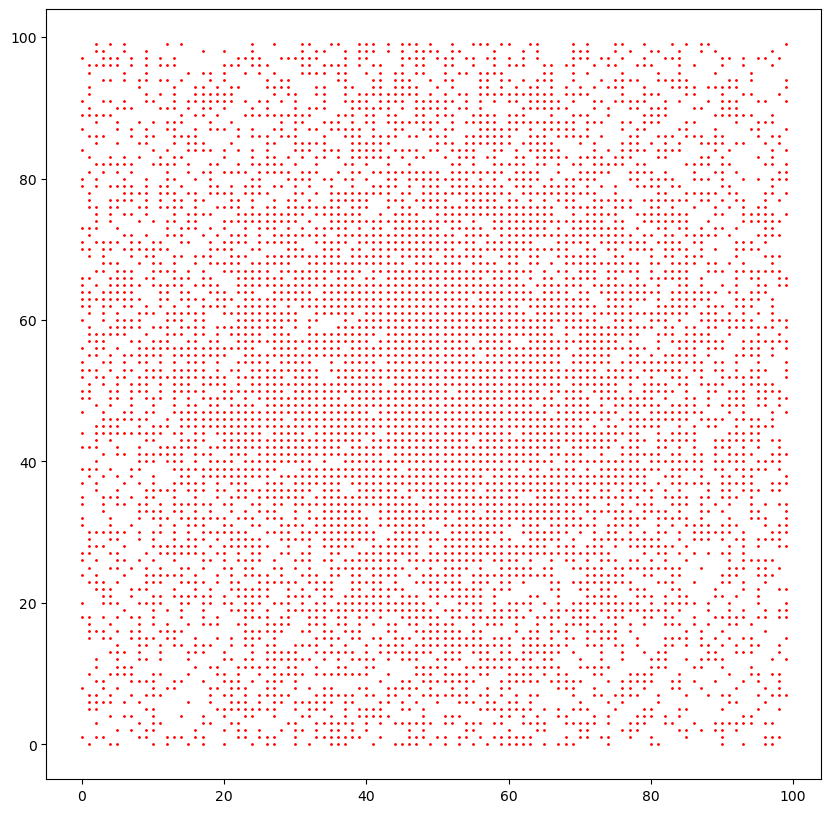

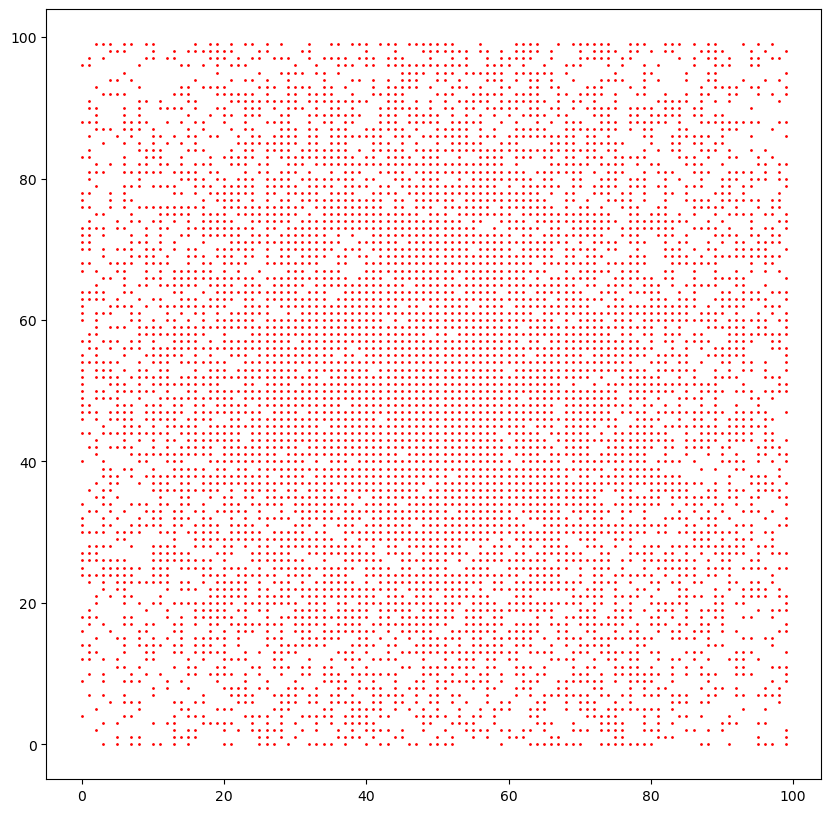

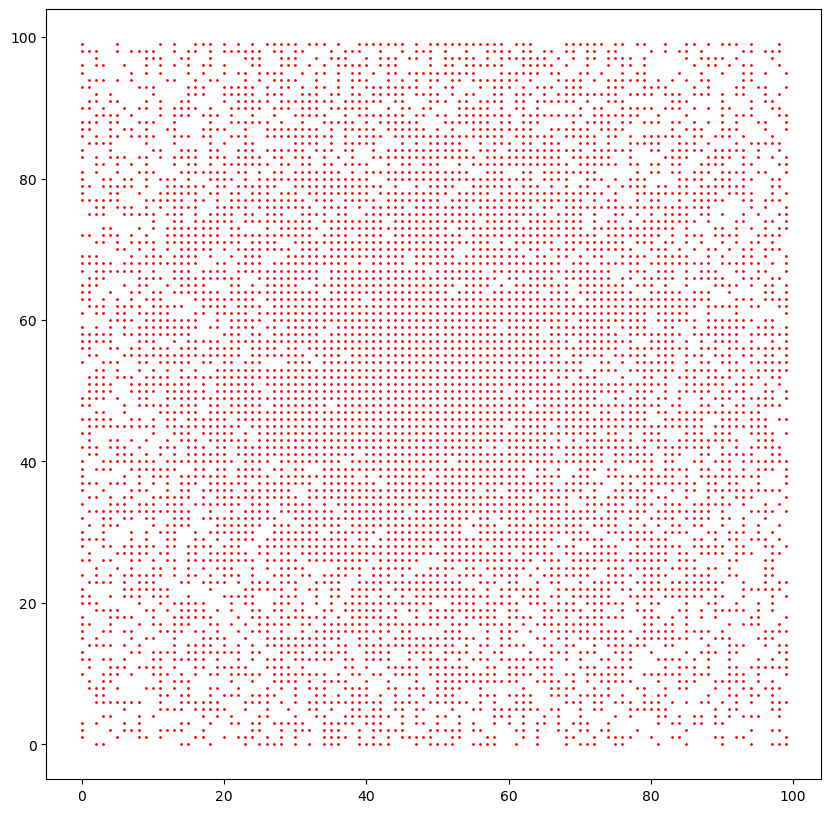

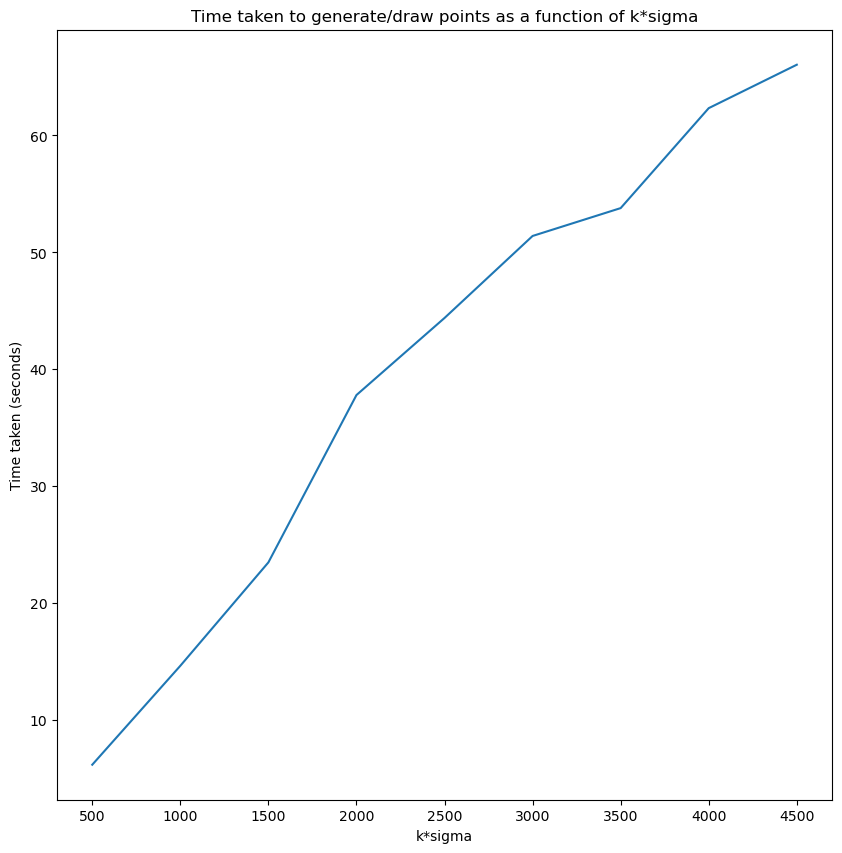

In [11]:
import time
# Define the range of k values
k_values = np.arange(100, 1000, 100)

# Initialize the list to store the time taken for each k value
time_taken_values = []

# For each k value, measure the time taken to generate/draw the points
for k in k_values:
    # Create a 30x50 picture
    plt.figure(figsize=(10, 10))

    # Start the timer
    start_time = time.time()

    # Create and draw the points
    loop = asyncio.get_event_loop()
    tasks = []
    for i in np.arange(0, 100, dm):
        for j in np.arange(0, 100, dn):
            task = loop.create_task(draw_point(i, j, ic, jc, k, sigma))
            tasks.append(task)
    await asyncio.gather(*tasks)

    # Stop the timer
    end_time = time.time()

    # Calculate and store the time taken
    time_taken = end_time - start_time
    time_taken_values.append(time_taken)

    # Show the picture
    plt.show()

# Plot the time taken as a function of k*sigma
plt.figure(figsize=(10, 10))
plt.plot(k_values*sigma, time_taken_values)
plt.xlabel('k*sigma')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken to generate/draw points as a function of k*sigma')
plt.show()